# **Regression Project: Boston House Price Prediction**

# **Marks: 60**

Welcome to the project on regression. We will use the **Boston house price dataset** for this project.

-------------------------------
## **Objective**
-------------------------------

The problem at hand is to **predict the housing prices of a town or a suburb based on the features of the locality provided to us**. In the process, we need to **identify the most important features affecting the price of the house**. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for the unseen data.

----------------------------
## **Dataset**
---------------------------

Each record in the database describes a house in Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below:

Attribute Information:

- **CRIM:** Per capita crime rate by town
- **ZN:** Proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS:** Proportion of non-retail business acres per town
- **CHAS:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX:** Nitric Oxide concentration (parts per 10 million)
- **RM:** The average number of rooms per dwelling
- **AGE:** Proportion of owner-occupied units built before 1940
- **DIS:** Weighted distances to five Boston employment centers
- **RAD:** Index of accessibility to radial highways
- **TAX:** Full-value property-tax rate per 10,000 dollars
- **PTRATIO:** Pupil-teacher ratio by town
- **LSTAT:** % lower status of the population
- **MEDV:** Median value of owner-occupied homes in 1000 dollars

## **Importing the necessary libraries**

In [158]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split and prepare the data
from sklearn.model_selection import train_test_split

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)

# Import libraries for building linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

### Loading the dataset

In [159]:
# Load the data
Boston_df=pd.read_csv("Boston.csv")
# Copying data to another variable to avoid any changes to original data
data=Boston_df.copy()

## Data Overview

In [160]:
#View the different columns variables
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

In [161]:
#View the first and last 5 rows of the dataset
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [162]:
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,7.88,11.9


**Observation:**

- The price of the house indicated by the variable MEDV is the target variable and the rest are independent variables based on which we will predict the housing prices of a town or a suburb.

In [163]:
# Understand the shape of the dataset
data.shape
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 506 rows and 13 columns.


In [164]:
#Chech the data types of the columns for the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


**Observation:**

- All columns are numerical variables made up of floats and intergers.
- There are 506 non-null observations in each of the columns. This indicates that there are no missing values in the data.
- Small datadet less than 1MBits.

In [165]:
# Let's check the statistical summary of the data
data.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


**Observation**

- The average number of rooms per dwelling is 6 with a minimum of 3 and maximum of 8
- Average pupil-teacher ration by town is 18 with a minimum of 12 and maximum of 22
- On average 12% lower status of the population 
- On average 68 proportion of owner-occupied units built before 1940
- Median value of owner-occupied homes is around $21k

## Sanity Checks

In [166]:
# ID the unique number of values in the dataset
data.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
LSTAT      455
MEDV       229
dtype: int64

**Observation:**

- There seems to be no unsignificant columns to drop

In [167]:
#Checking for missing values in the data
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

**Observation**

- There are no missing values in the data

In [168]:
#Checking for duplicate values
data.duplicated().sum()

0

**Observation**

- There a no duplicates values in the data

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1. What does the distribution of 'MEDV' look like?
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. What are all the inferences that can be found by doing univariate analysis for different variables?
4. Do bivariate analysis to visualize the relationship between the features having significant correlations (>= 0.7 or <= -0.7)

### Univariate Analysis

In [169]:
# Function to plot a boxplot and a histogram along the same scale


def histogram_boxplot(data, feature, figsize = (12, 7), kde = False, bins = None):
    
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12, 7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,  # Number of rows of the subplot grid= 2
        sharex = True,  # X-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )  # Creating the 2 subplots
    sns.boxplot(
        data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )  # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )  # Add median to the histogram

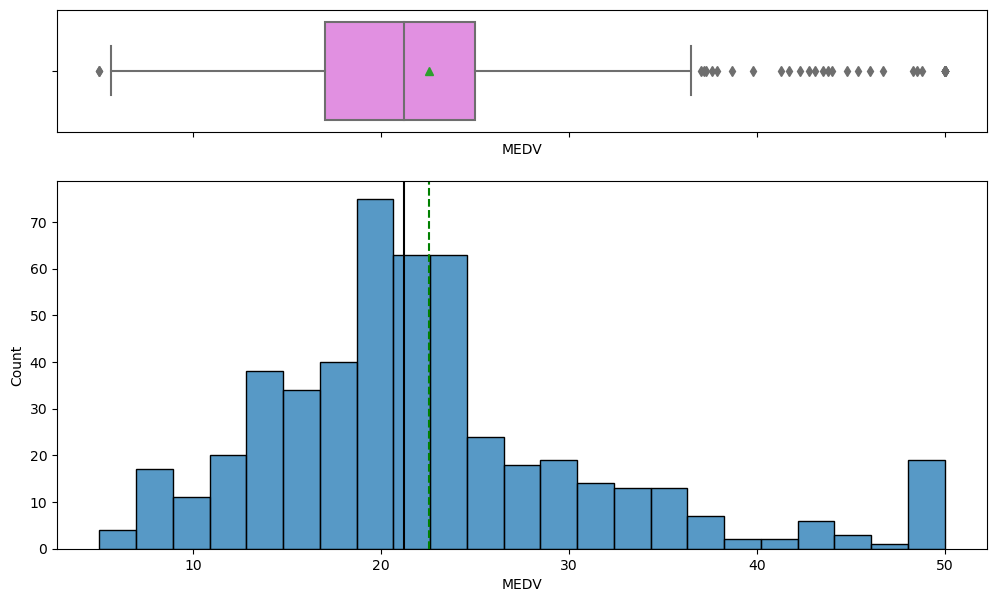

In [170]:
# Let's plot th etarget variable first MEDV
histogram_boxplot(data, "MEDV")

**Observation:**

- The MEDV is slightly skewed to the right but one can also see a slight uniformity in the distribution with mean and median very closed to each other around 22.
- There are outliers

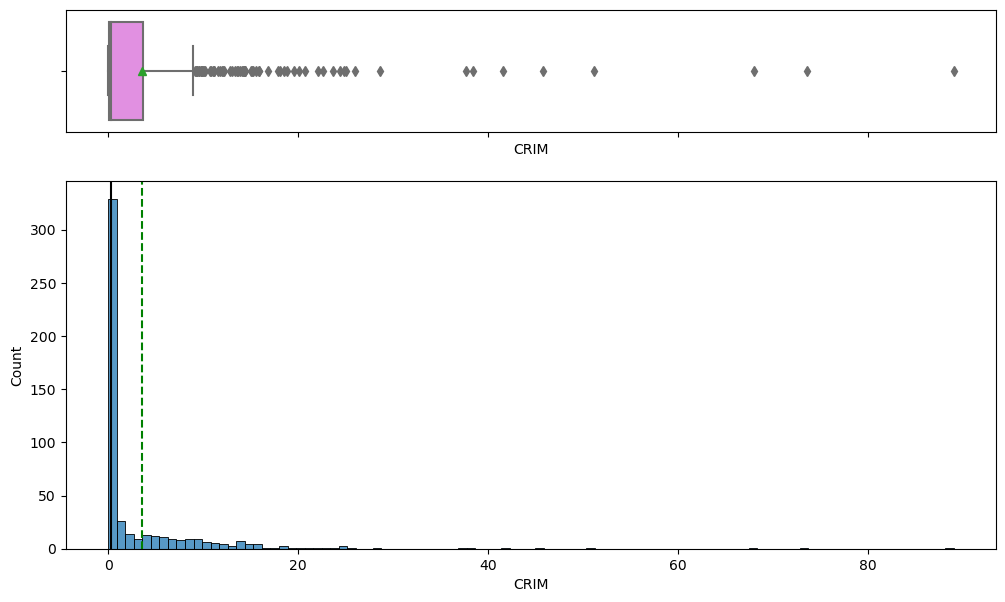

In [171]:
# Plot CRIM
histogram_boxplot(data, "CRIM")

**Observation:**

- The distribution is right skewed with the median lying around 0.25
- There are outliers

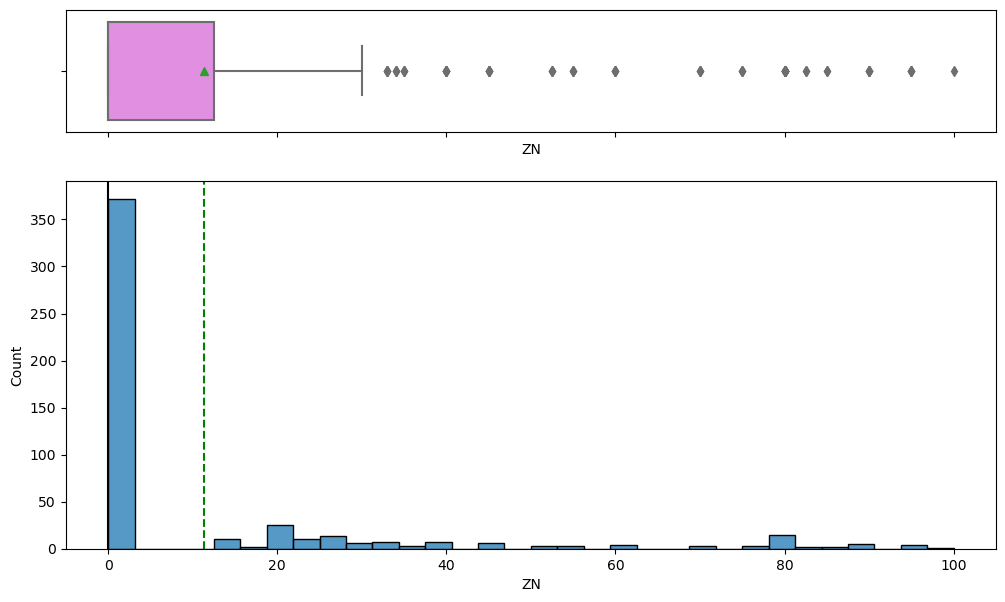

In [172]:
# Plot ZN
histogram_boxplot(data, "ZN")

**Observation:**

- The distribution is right skewed with median lying around 12.5
- There are outliers

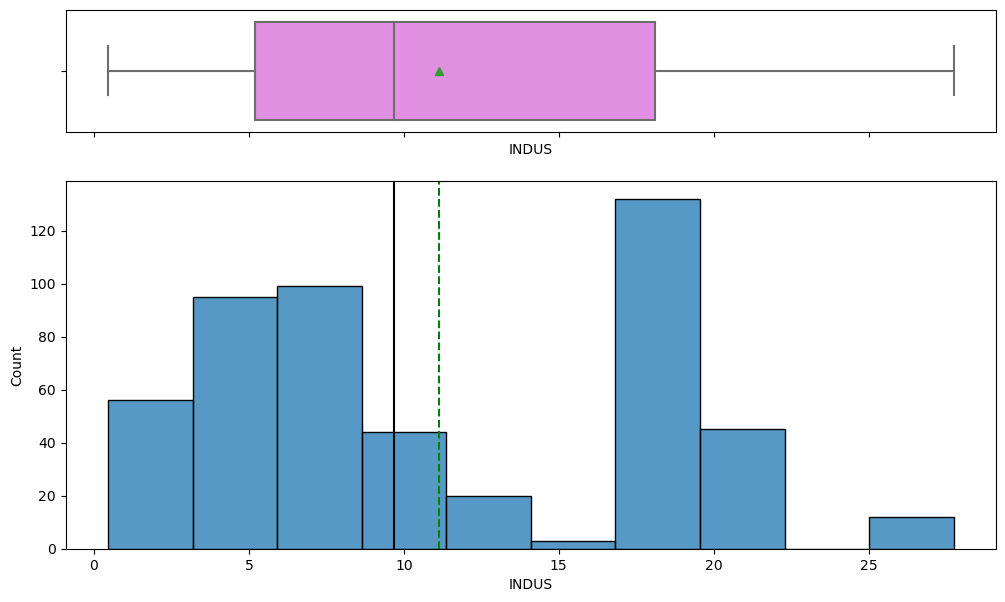

In [173]:
# Plot INDUS
histogram_boxplot(data, "INDUS")

**Observation:**

- It seems difficult to conclude on the distribution.
- No outliers

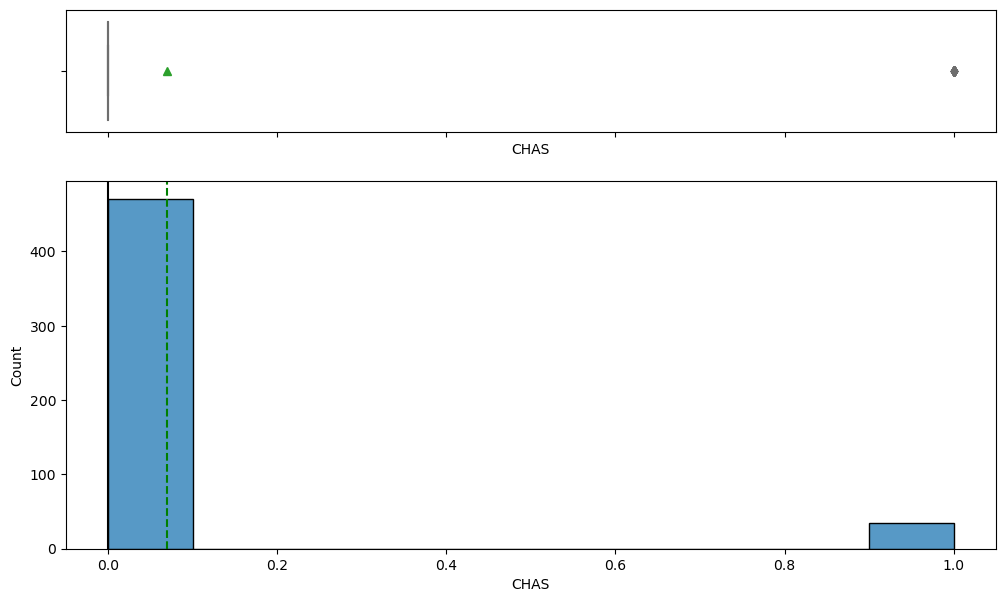

In [174]:
# Plot CHAS
histogram_boxplot(data, "CHAS")

**Observation:**

- Houses with tract that don't bound with charles river have the highest number than tract that bound the river

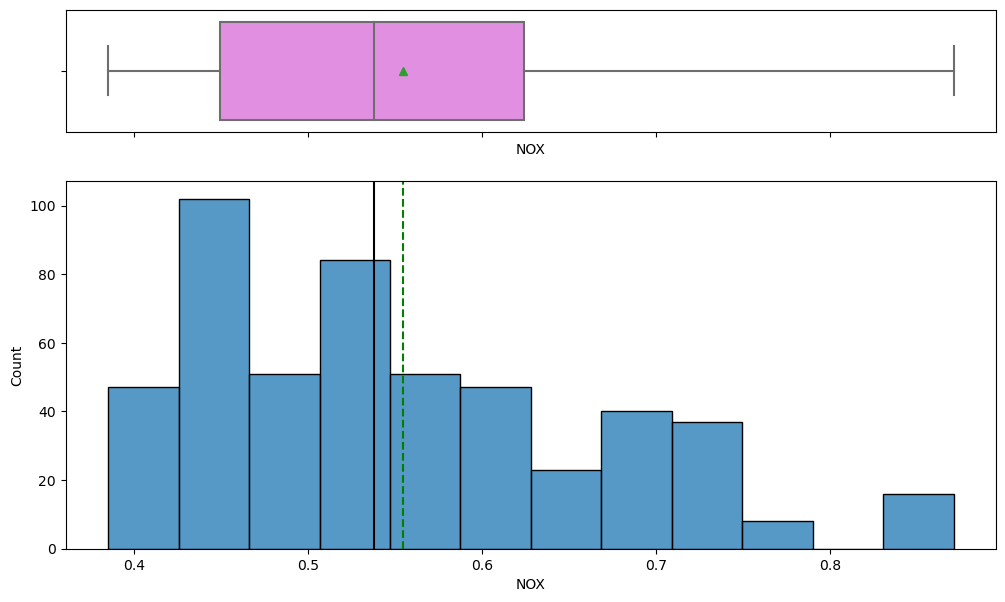

In [175]:
# Plot NOX
histogram_boxplot(data, "NOX")

**Observation:**

- The distibution is slightly skewed to the right
- No outliers

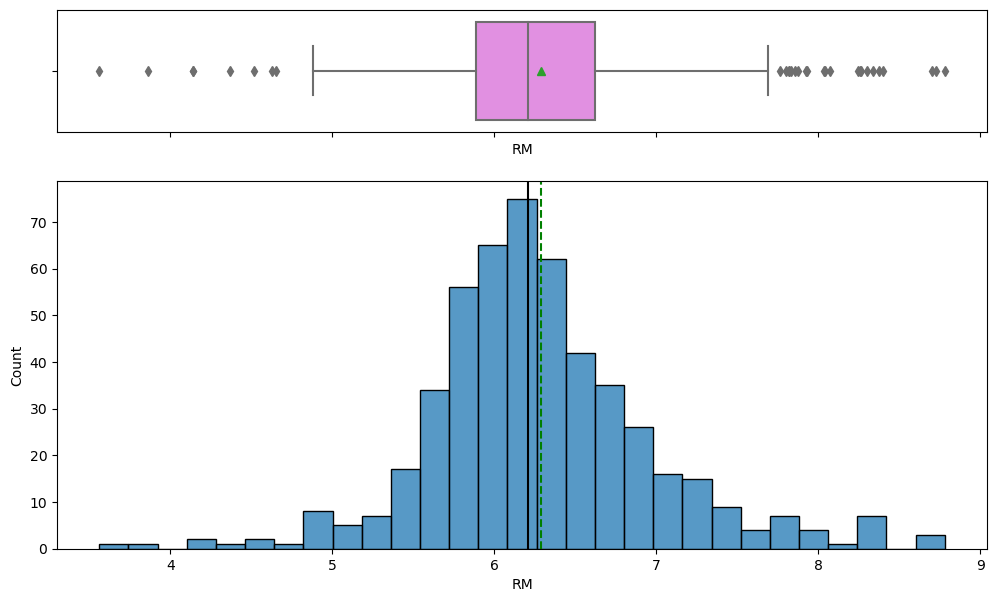

In [176]:
# Plot RM
histogram_boxplot(data, "RM")

**Observation:**

- The average number of rooms is uniformly distributed with mean and median lying around 6.
- There are outliers

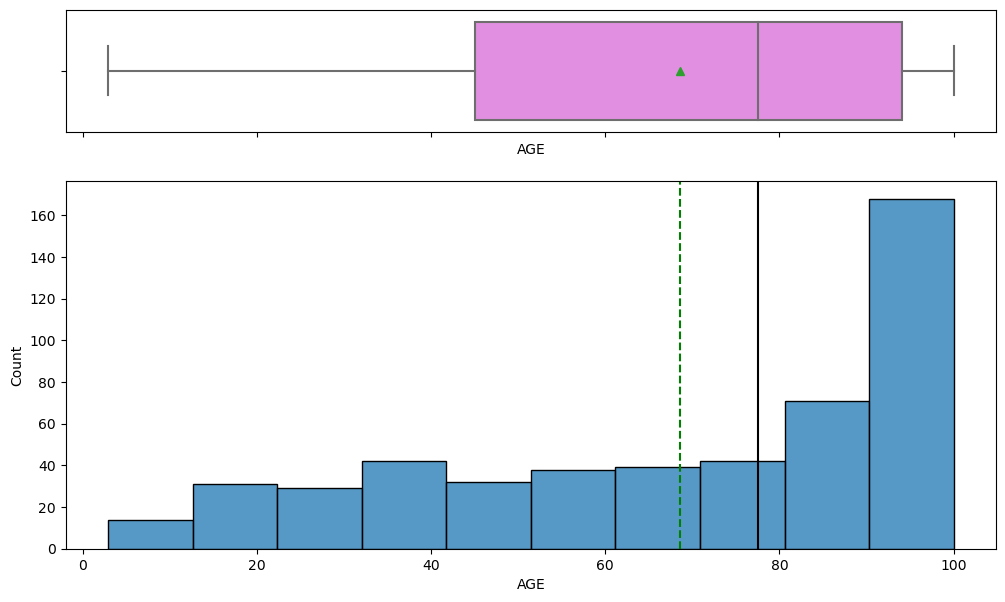

In [177]:
# Plot AGE
histogram_boxplot(data, "AGE")

**Observation:**

- The distribution is skewed to the left with median lying around 77
- No outliers

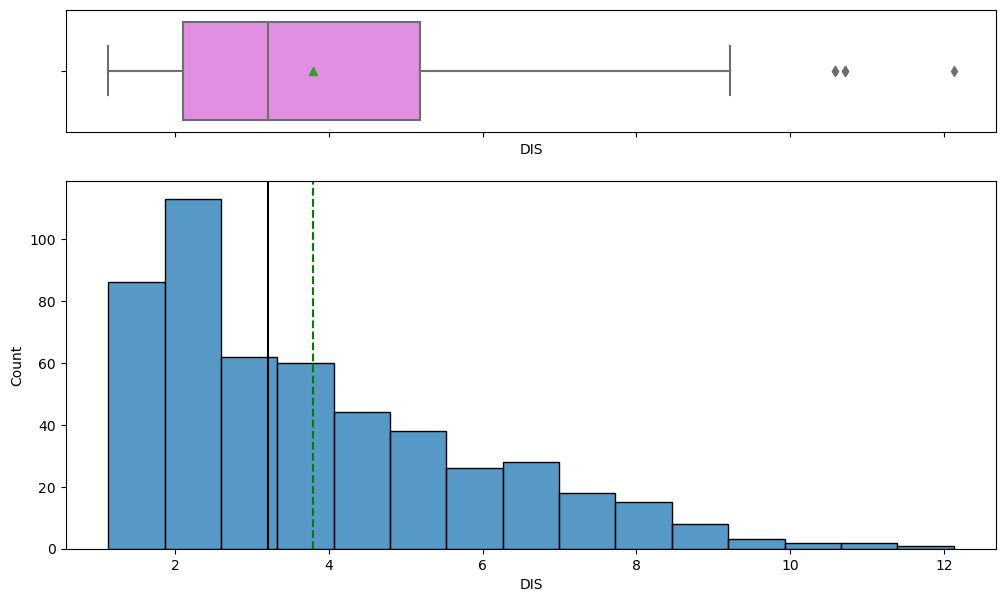

In [178]:
# Plot DIS
histogram_boxplot(data, "DIS")

**Observation:**

- The distribution is skewed to the right with median lying around 5
- Few outliers

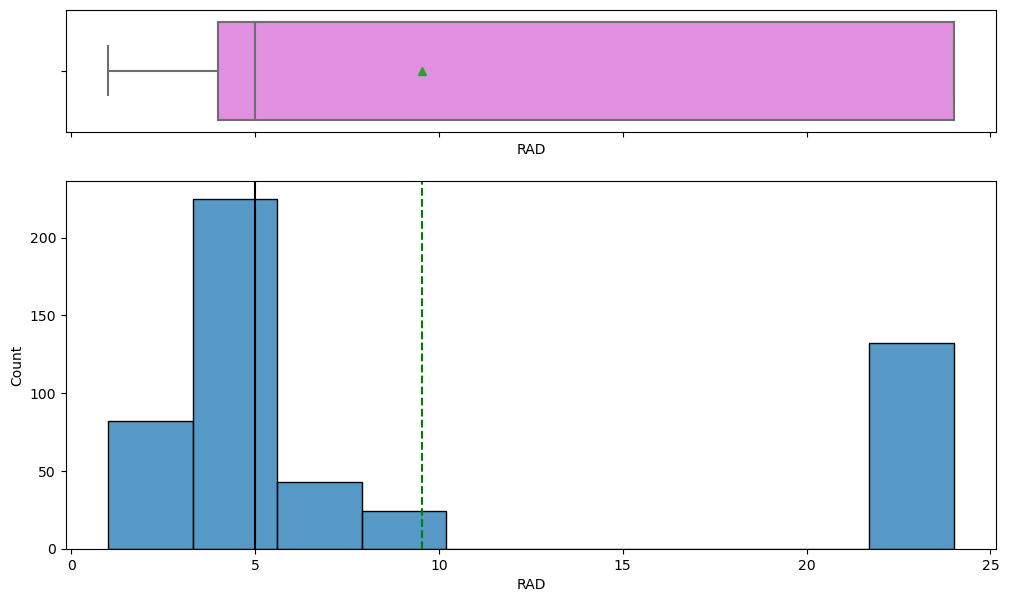

In [179]:
# Plot RAD
histogram_boxplot(data, "RAD")

**Observation:**

- It seems difficult to decide on the distribution
- No outliers

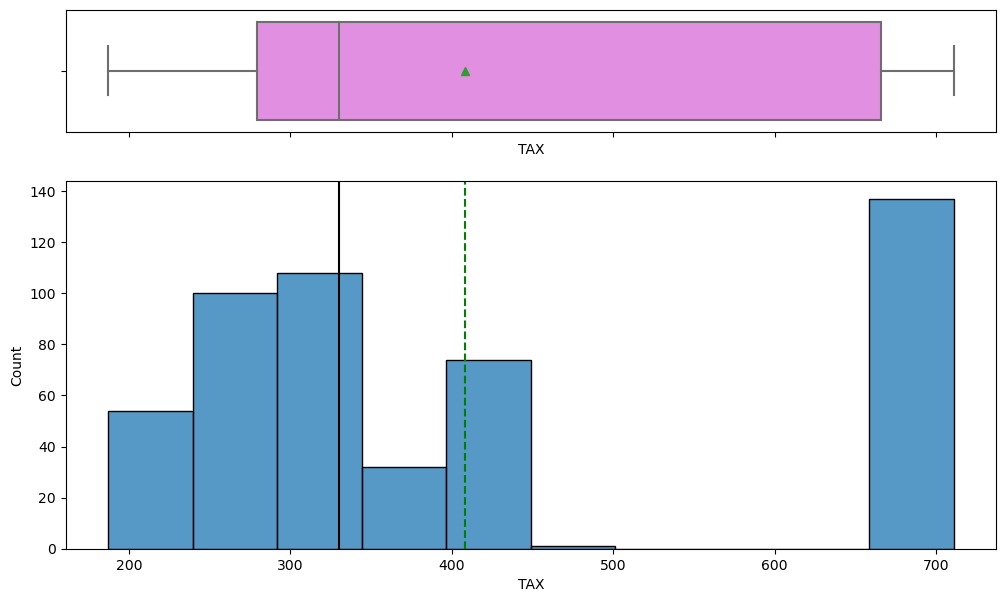

In [180]:
# Plot TAX
histogram_boxplot(data, "TAX")

**Observation:**

- The distribution is slightly uniform
- no outliers

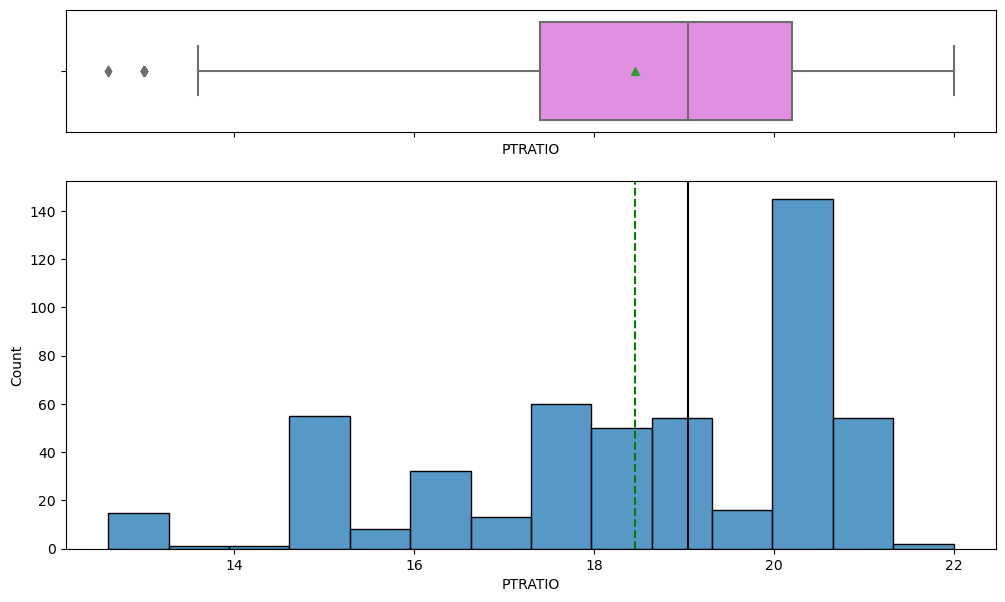

In [181]:
# Plot PTRATIO
histogram_boxplot(data, "PTRATIO")

**Observation:**

- The distribution is skewed to the left
- Few outliers

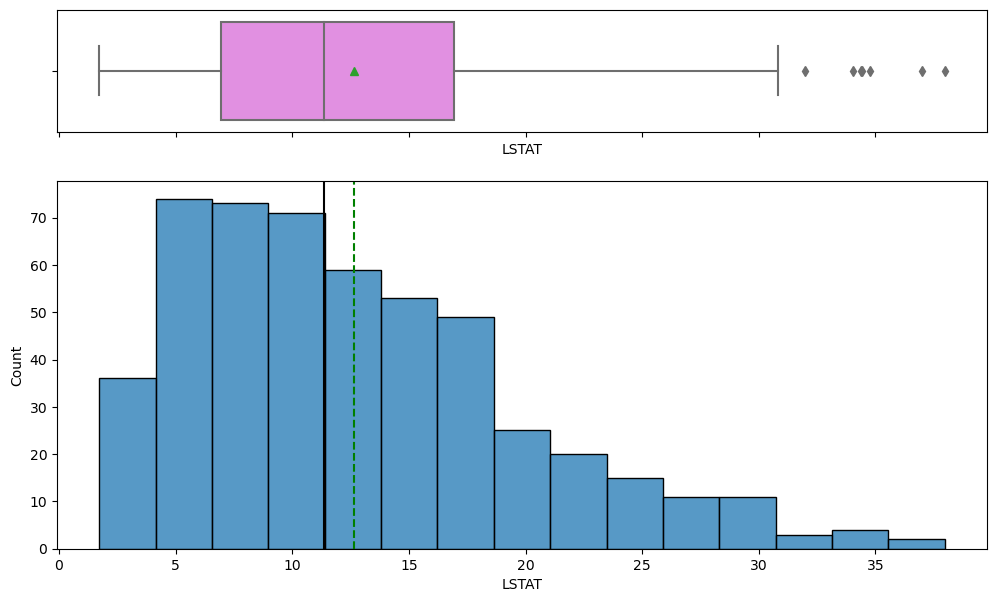

In [182]:
# Plot LSTAT
histogram_boxplot(data, "LSTAT")

**Observation:**

- The distribution is skewed to the right
- Few outliers

### Bivariate Analysis

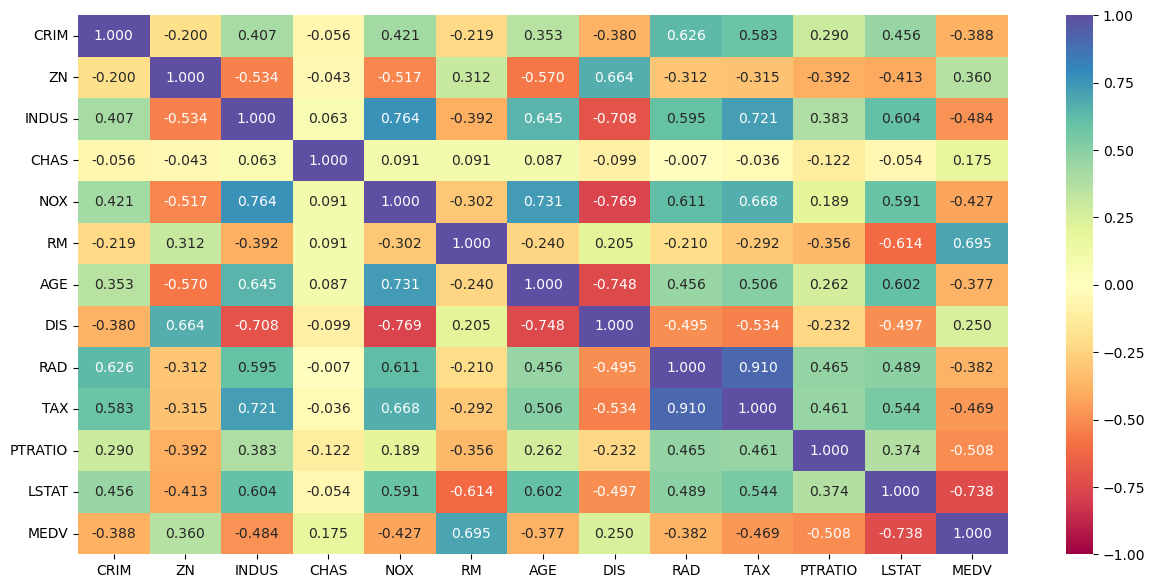

In [183]:
#What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
# Correlation check
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".3f", cmap="Spectral")
plt.show()

**Observation:**

- ZN, CHAS, RM, DIS are moderatly positively correlated with the target variable MEDV
- CRIM, INDUS, NOX, AGE, RAD,TAX, PTRATIO, LSTAT are moderatly negatively correlated with the target variable MEDV
- TAX and RAD are highly positively correlated with each other (0.91), therefore we will drop one of them. Let us drop TAX.
- INDUS and NOX are highly positively correlated with each other(0.76)

In [184]:
data=data.drop(columns='TAX')

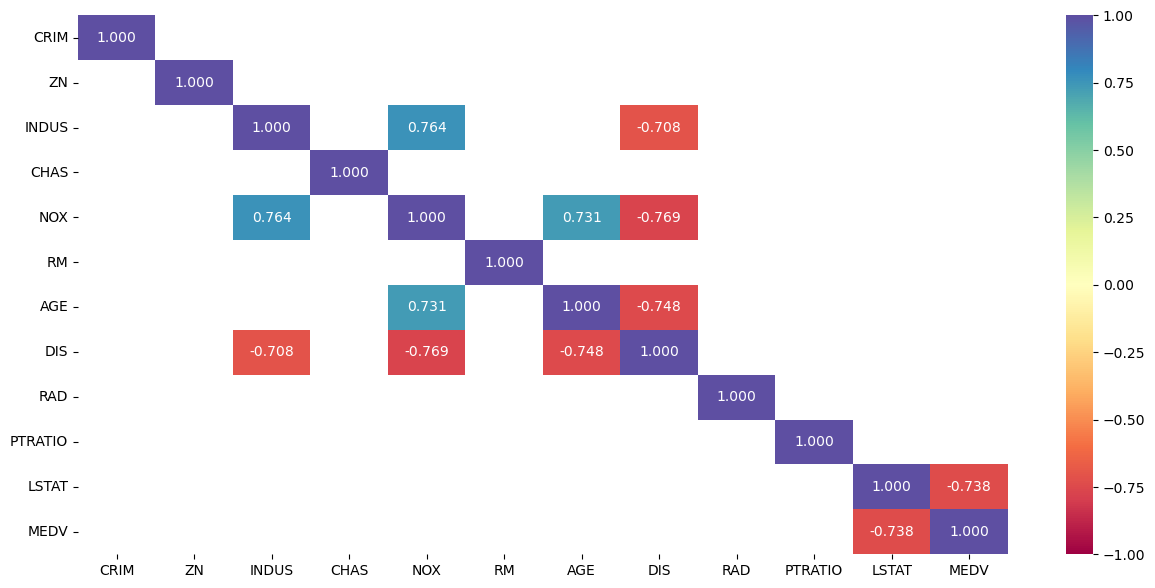

In [185]:
# Features having significant correlations (>= 0.7 or <= -0.7)
# Filtered_correlation_matrix = correlation_matrix[(correlation_matrix >= -0.7) & (correlation_matrix <= 0.7)]
plt.figure(figsize=(15,7))
cor_matrix=data.corr()
matrix=cor_matrix[(cor_matrix<=-0.7) | (cor_matrix>=0.7)]
sns.heatmap(matrix, annot=True, vmin=-1, vmax=1, fmt=".3f", cmap="Spectral")  
plt.show()

**Observation:**

- Features with significant correlations >=0.7

MEDV AND RM - The value of homes is positively correlated to the number of rooms

TAX and INDUS- The tax rate increase with the number of non-retail business acres per town

AGE and NOX - Houses built before 1940 increase as the area is polluted (Nitric Oxide concentration) 

NOX and INDUS - the number of non-retail business acres per town increase as the area is polluted

TAX and RAD - Tax rate is positively correlated to accessibility to radial highways

- Features with significant correlations <=-0.7

MEDV and LSTAT - The value of homes is negatively correlated to the status of population

DIS and INDUS - The high the distance to five Boston enployment centers, the less the number of non-retail business acre per town

DIS and NOX - The high the distance to five Boston enployment centers, the less polluted the area is

DIS and AGE- The high the distance to five Boston enployment centers, the less the number of houses built before 1940

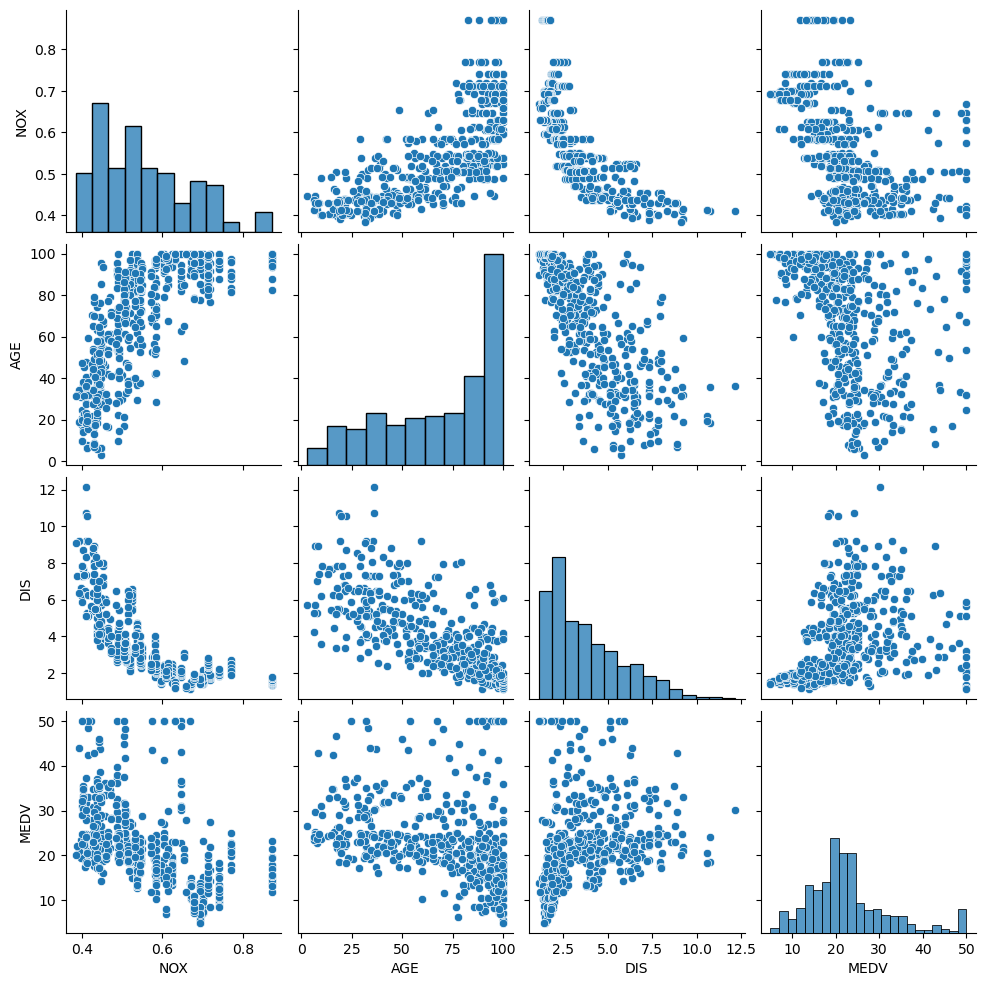

In [186]:
#create the upper triangle matrix of the correlation matrix
upper = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
#select  the columns that have correlations less than -0.7 and more than 0.7
cor_list= [column for column in upper.columns if any((upper[column]<= -0.7) | (upper[column]>= 0.7) )]
sns.pairplot(data[cor_list])

**Observation:**

- There no clear correlation between the target variable MEDV and NOX, AGE, DIS and TAX

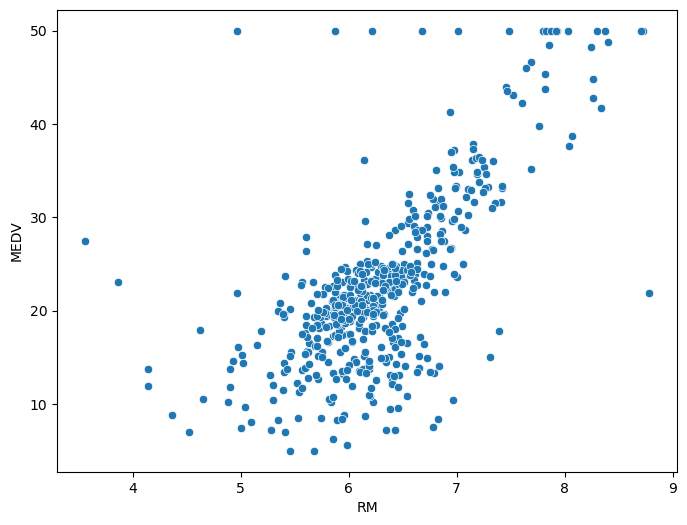

In [187]:
# Do bivariate analysis to visualize the relationship between the features having significant correlations (>= 0.7 or <= -0.7)
# Check the distribution between MEDV and RM
plt.figure(figsize=[8,6])
sns.scatterplot(x=data.RM, y=data.MEDV)
plt.show()

**Observation:**

- The house price increases as the number rooms increases

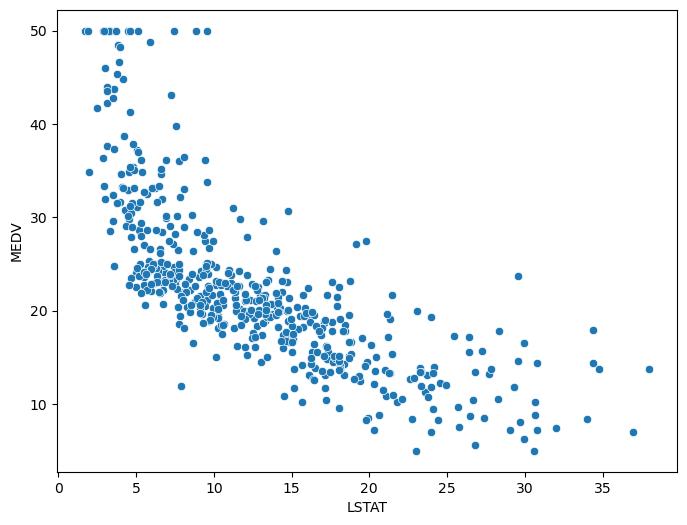

In [188]:
# Check the distribution between MEDV and LSTAT
plt.figure(figsize=[8,6])
sns.scatterplot(x=data.LSTAT, y=data.MEDV)
plt.show()

**Observation:**

- MEDV and LSTAT are negatively correlated. The price of the house increase with lower status of the population.

## Data Preprocessing

- Missing value treatment
- Log transformation of dependent variable if skewed
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

- Missing value treatment

There is no missing values, No treament needed

- Dependent variable MEDV distribution seems to be uniformly distributed

No log transformation needed

**Outlier Check**

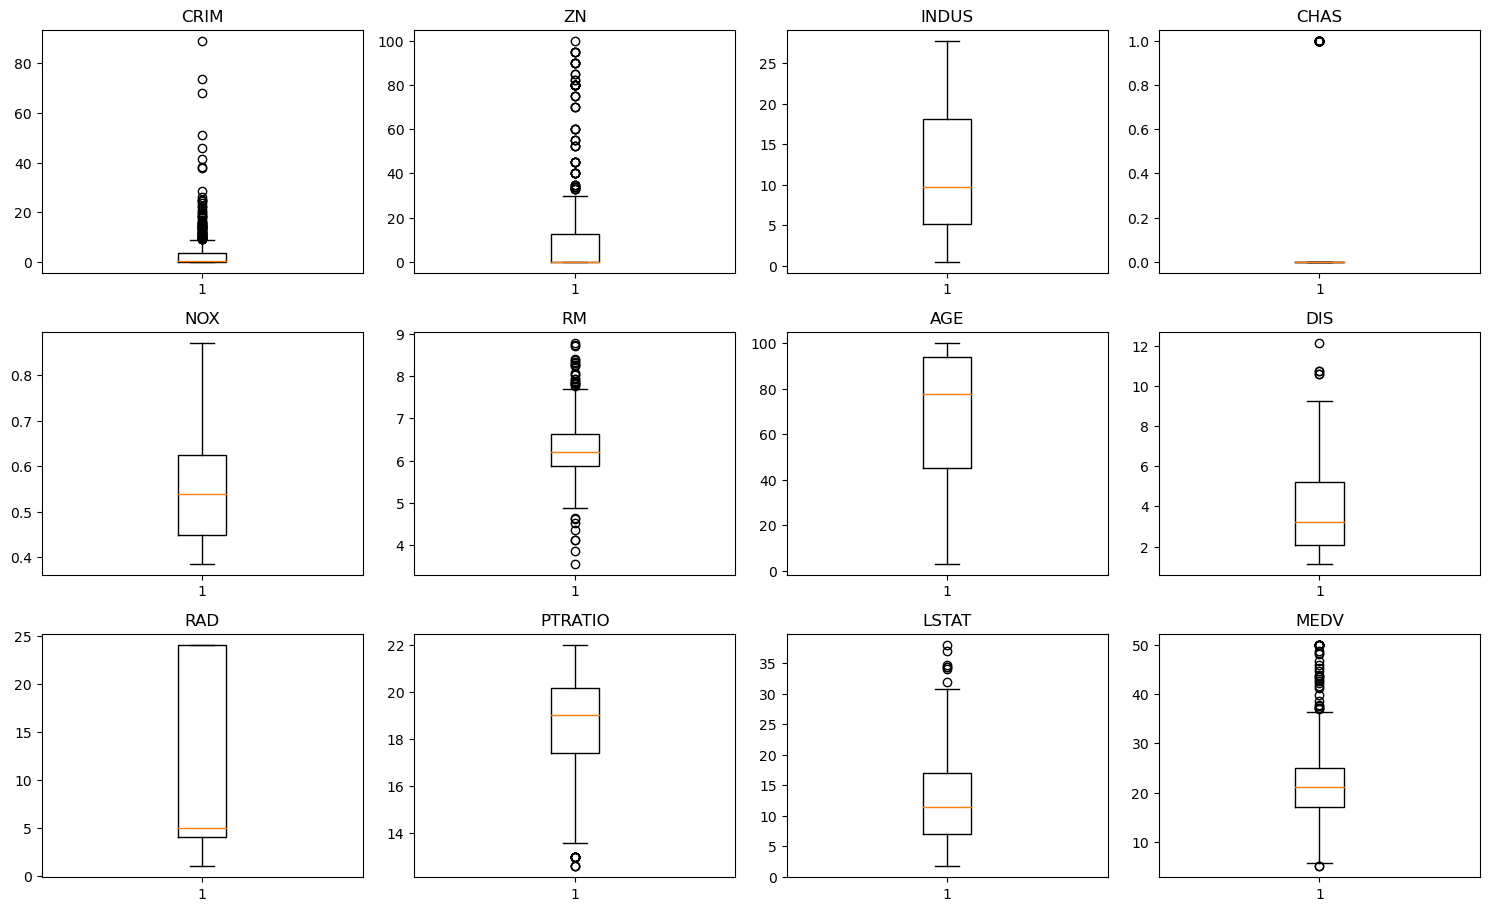

In [189]:
# Let's check for outliers in the data
# Outlier detection using boxplot
numeric_columns = data.select_dtypes(include = np.number).columns.tolist()

plt.figure(figsize = (15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis = 1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations:**

- There are outliers in the data variables CRIM, ZN, RM, LSTAT, DIS, PTRATIO and MEDV
- However, we will not treat them as they are proper values

## **Check for multicollinearity**

We will use the Variance Inflation Factor (VIF), to check if there is multicollinearity in the data.

Features having a VIF score > 5 will be dropped / treated till all the features have a VIF score < 5

In [190]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(data))

    feature         VIF
0      CRIM    2.119996
1        ZN    2.742833
2     INDUS   11.759782
3      CHAS    1.163438
4       NOX   71.201662
5        RM  135.094643
6       AGE   21.346163
7       DIS   15.104168
8       RAD    5.188203
9   PTRATIO   77.001623
10    LSTAT   12.607126
11     MEDV   22.829343


**Observations:**

- RAD and TAX have a VIF greater than 5, therefore they need to be dropped or treated.
- We will drop them on model2

## Model Building - Linear Regression

In [243]:
# Let's create a function to calculate the performance metrics for our regression model so that we don't need to use the same code repeatedly.


from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error, mean_squared_error

# Model Performance on test and train data
def model_function(model, x_train, x_test, y_train, y_test):

    # Insample Prediction
    y_pred_train = model.predict(x_train)
    y_observed_train = y_train

    # Prediction on test data
    y_pred_test = model.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    np.sqrt(mean_squared_error(y_pred_train, y_observed_train)),
                    np.sqrt(mean_squared_error(y_pred_test, y_observed_test)),
                ],
                "MAE": [
                    mean_absolute_error(y_pred_train, y_observed_train),
                    mean_absolute_error(y_pred_test, y_observed_test),
                ],
                
                "r2": [
                    r2_score(y_pred_train, y_observed_train),
                    r2_score(y_pred_test, y_observed_test),
                ],
            }
        )
    )

## Model 1

In [217]:
# Separating features and the target column
X_1 = data.drop(columns='MEDV')
y_1 = data['MEDV']

In [218]:
X_1 = sm.add_constant(X_1)

In [219]:
# Splitting the data into train and test sets in 70:30 ratio
X_train_1, X_test_1, y_train_1, y_test_1 =train_test_split(X_1, y_1, test_size=0.3, random_state=1)

In [220]:
# Create the model
model1=sm.OLS(y_train_1, X_train_1).fit()

In [221]:
# Get the model summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     73.53
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           3.64e-83
Time:                        19:49:43   Log-Likelihood:                -1065.8
No. Observations:                 354   AIC:                             2156.
Df Residuals:                     342   BIC:                             2202.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.7735      6.126      7.961      0.000      36.723      60.824
CRIM          -0.1116      0.043     -2.580      0.010      -0.197      -0.027
ZN             0.0480      0.018      2.694      0.007       0.013       0.083
INDUS         -0.0216      0.070     -0.308      0.758      -0.160       0.116
CHAS           2.8684      0.978      2.934      0.004       0.946       4.791
NOX          -23.2036      4.707     -4.930      0.000     -32.461     -13.946
RM             2.7468      0.523      5.248      0.000       1.717       3.776
AGE            0.0041      0.017      0.246      0.806      -0.029       0.037
DIS           -1.4923      0.259     -5.760      0.000      -2.002      -0.983
RAD            0.1381      0.052      2.665      0.008       0.036       0.240
PTRATIO       -1.0409      0.171     -6.080      0.000      -1.378      -0.704
LSTAT         -0.5828      0.062     -9.429      0.000      -0.704      -0.461
==============================================================================
Omnibus:                      129.924   Durbin-Watson:                   1.805
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              505.090
Skew:                           1.580   Prob(JB):                    2.09e-110
Kurtosis:                       7.925   Cond. No.                     2.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [222]:
perf_model1 = model_function(model1, X_train_1, X_test_1,y_train_1, y_test_1)
perf_model1

    Data      RMSE       MAE        r2
0  Train  4.911962  3.424707  0.577171
1   Test  4.667962  3.511065  0.597351


**Observation:**

- The Train and Test scires are very close to each other so we can say the model is not overfitting
- Some scores (MAE & r2) for the Test are better than those of the Train score. So we might be able to get better performance if we increase the complexity of the model.

## Model 2

**Drop variables with VIF>5 and that have 90% correlation with each other**

In [223]:
# Separating features and the target column
X_1 = data.drop(columns='MEDV')
y_1 = data['MEDV']
# Splitting the data into train and test sets in 70:30 ratio
X_train_1, X_test_1, y_train_1, y_test_1 =train_test_split(X_1, y_1, test_size=0.3, random_state=1)

In [224]:
# Drop variables with VIF>5 and that have 90% correlation with each other
data1=data.drop(columns=['RAD'])

#Separating features and the target column
X_2 = data1.drop(columns=['MEDV'])
y_2 = data1['MEDV']

In [225]:
X_2 = sm.add_constant(X_2)

In [226]:
# Splitting the data into train and test sets in 70:30 ratio
X_train_2, X_test_2, y_train_2, y_test_2 =train_test_split(X_2, y_2, test_size=0.3, random_state=1)

In [227]:
# Create the model
model2=sm.OLS(y_train_2, X_train_2).fit()

In [228]:
# Get the model summary
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     78.77
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           1.29e-82
Time:                        19:49:48   Log-Likelihood:                -1069.4
No. Observations:                 354   AIC:                             2161.
Df Residuals:                     343   BIC:                             2203.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.8912      5.605      7.474      0.000      30.867      52.915
CRIM          -0.0569      0.038     -1.481      0.140      -0.132       0.019
ZN             0.0535      0.018      2.996      0.003       0.018       0.089
INDUS         -0.0011      0.070     -0.016      0.988      -0.139       0.137
CHAS           2.9088      0.986      2.950      0.003       0.969       4.848
NOX          -18.6939      4.431     -4.219      0.000     -27.409      -9.979
RM             3.0396      0.516      5.888      0.000       2.024       4.055
AGE            0.0002      0.017      0.011      0.991      -0.033       0.033
DIS           -1.4976      0.261     -5.730      0.000      -2.012      -0.984
PTRATIO       -0.8452      0.156     -5.418      0.000      -1.152      -0.538
LSTAT         -0.5782      0.062     -9.277      0.000      -0.701      -0.456
==============================================================================
Omnibus:                      145.588   Durbin-Watson:                   1.837
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              668.905
Skew:                           1.725   Prob(JB):                    5.61e-146
Kurtosis:                       8.783   Cond. No.                     1.85e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [229]:
#Test performance
perf_model2 = model_function(model2, X_train_2, X_test_2,y_train_2, y_test_2)
perf_model2

    Data      RMSE       MAE        r2
0  Train  4.962695  3.424381  0.564568
1   Test  4.649477  3.499449  0.604808


**Observation:**

- The Train and the Test scores are very close to each other. So, we can say the model is not overfitting.
- Some scores (MAE & r2) for the Test are better than those of the Train score.

## Model 3

**Drop variables of the cor_list that have correlations less than -0.7 and more than 0.7**

In [230]:
# Drop variables of the cor_list that have correlations less than -0.7 and more than 0.7
# Separating features and the target column
X_3 =data.drop(columns=cor_list)
y_3 = data['MEDV']

In [231]:
X_3 = sm.add_constant(X_3)

In [232]:
# Splitting the data into train and test sets in 70:30 ratio
X_train_3, X_test_3, y_train_3, y_test_3 =train_test_split(X_3, y_3, test_size=0.3, random_state=1)

In [233]:
# Create the model
model3=sm.OLS(y_train_3, X_train_3).fit()

In [234]:
# Get the model summary
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     84.68
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           1.07e-76
Time:                        19:50:32   Log-Likelihood:                -1088.2
No. Observations:                 354   AIC:                             2194.
Df Residuals:                     345   BIC:                             2229.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.8800      5.226      5.144      0.000      16.601      37.159
CRIM          -0.0680      0.045     -1.499      0.135      -0.157       0.021
ZN             0.0022      0.015      0.147      0.883      -0.028       0.032
INDUS         -0.0228      0.062     -0.368      0.713      -0.145       0.099
CHAS           2.9979      1.032      2.905      0.004       0.968       5.027
RM             3.2633      0.539      6.054      0.000       2.203       4.323
RAD            0.0740      0.051      1.453      0.147      -0.026       0.174
PTRATIO       -0.9572      0.165     -5.790      0.000      -1.282      -0.632
LSTAT         -0.5993      0.059    -10.106      0.000      -0.716      -0.483
==============================================================================
Omnibus:                      143.870   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              646.026
Skew:                           1.711   Prob(JB):                    5.22e-141
Kurtosis:                       8.665   Cond. No.                         590.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [235]:
#Test performance
perf_model3 = model_function(model3, X_train_3, X_test_3,y_train_3, y_test_3)
perf_model3

    Data      RMSE       MAE        r2
0  Train  5.234160  3.591233  0.490703
1   Test  4.935916  3.775384  0.501386


**Observation:**

- The Train and the Test scores are very close to each other. So, we can say the model is not overfitting.
- Some scores (MAE & r2) for the Test are better than those of the Train score.

## Model 4

 **Drop insignificant variables (variables with p-value >0.05)  from all the above model and create the regression model again**

In [236]:
# Drop insignificant variables (variables with p-value >0.05) 
data3=data.drop(columns=['RAD','INDUS','CRIM','ZN','AGE'])

#Separating features and the target column
X_4 = data3.drop(columns=['MEDV'])
y_4 = data3['MEDV']

In [237]:
X_4 = sm.add_constant(X_4)

In [238]:
# Splitting the data into train and test sets in 70:30 ratio
X_train_4, X_test_4, y_train_4, y_test_4 =train_test_split(X_4, y_4, test_size=0.3, random_state=1)

In [239]:
# Create the model
model4=sm.OLS(y_train_4, X_train_4).fit()

In [240]:
#Get the model summary
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     127.5
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           1.33e-84
Time:                        19:51:23   Log-Likelihood:                -1074.4
No. Observations:                 354   AIC:                             2163.
Df Residuals:                     347   BIC:                             2190.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.7892      5.540      7.723      0.000      31.892      53.686
CHAS           2.9573      0.991      2.983      0.003       1.008       4.907
NOX          -18.8328      3.874     -4.862      0.000     -26.452     -11.214
RM             3.2502      0.504      6.453      0.000       2.260       4.241
DIS           -1.0792      0.202     -5.331      0.000      -1.477      -0.681
PTRATIO       -1.0210      0.141     -7.256      0.000      -1.298      -0.744
LSTAT         -0.5861      0.056    -10.450      0.000      -0.696      -0.476
==============================================================================
Omnibus:                      147.764   Durbin-Watson:                   1.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              701.944
Skew:                           1.741   Prob(JB):                    3.76e-153
Kurtosis:                       8.955   Cond. No.                         539.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [241]:
#Test performance
perf_model4 = model_function(model4, X_train_4, X_test_4,y_train_4, y_test_4)
perf_model4

    Data      RMSE       MAE        r2
0  Train  5.033804  3.447837  0.546298
1   Test  4.677433  3.607346  0.593502


**Observation:**

- The Train and the Test scores are very close to each other. So, we can say the model is not overfitting.
- Some scores (MAE & r2) for the Test are better than those of the Train score.

## Model Performance Check

1. How does the model is performing? Check using Rsquared, RSME, MAE, MAPE
2. Is there multicollinearity? Check using VIF
3. How does the model is performing after cross validation?

In [246]:
# Let's compare the 3 models

# Defining list of models you have trained
model_performance= [perf_model1, perf_model2, perf_model3, perf_model4]
model=["model1", "model2","model3","model4"]
for i, perf in enumerate(model_function):
    perf['model']=model[i]

perf_df= pd.concat([perf_model1, perf_model2, perf_model3, perf_model4], ignore_index=False)

perf_df

TypeError: 'function' object is not iterable

**Observation:**

- Model1 has the lowest RMSE and MAE and the hihgest r2, therefore Model1 is the best when compared to Model2, Model2 and Model4

**Model1 is the best model. Now let's check linear regression assumptions and cross validation**

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

**Checking the below linear regression assumptions**

1. Mean of residuals should be 0
2. No Heteroscedasticity
3. Linearity of variables
4. Normality of error terms

In [98]:
# Check for mean residuals
residuals = model1.resid
np.mean(residuals)

3.143248373447223e-14

**Observation:**

- The mean of residuals is very close to 0. Hence, the corresponding assumption is satisfied.

In [108]:
# Check for homoscedasticity
# Null hypothesis: Residuals are homoscedastic
# Alternate hypothesis: Residuals have heteroscedastic

from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [113]:
name = ["F statistic", "p-value"]

test = sms.het_goldfeldquandt(residuals, X_train_1)

lzip(name, test)

[('F statistic', 1.2212537168483344), ('p-value', 0.09946256588927936)]

**Observation:**

- Since p-value>0.05, we cannot reject the Null hypothesis that the residuals are homoscedastic and the corresponding assumption is satisfied.

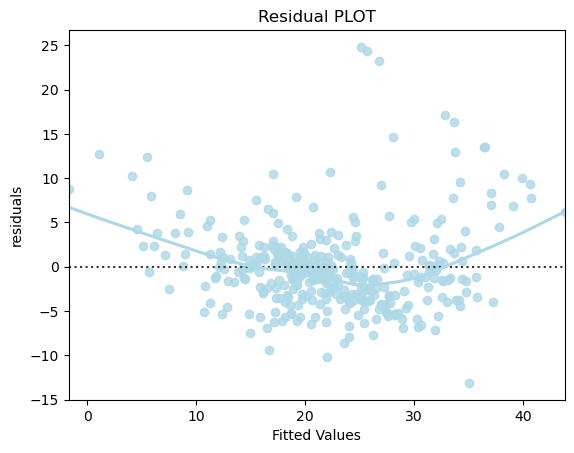

In [114]:
# Check linearity of variables

# Predicted values
fitted = model1.fittedvalues

# sns.set_style("whitegrid")
sns.residplot(x = fitted, y = residuals, color = "lightblue", lowess = True)

plt.xlabel("Fitted Values")

plt.ylabel("residuals")

plt.title("Residual PLOT")

plt.show()

**Observation:**

- There is no pattern in the residual vs fitted values plot. Hence, the corresponding assumption is satified.

<Axes: ylabel='Count'>

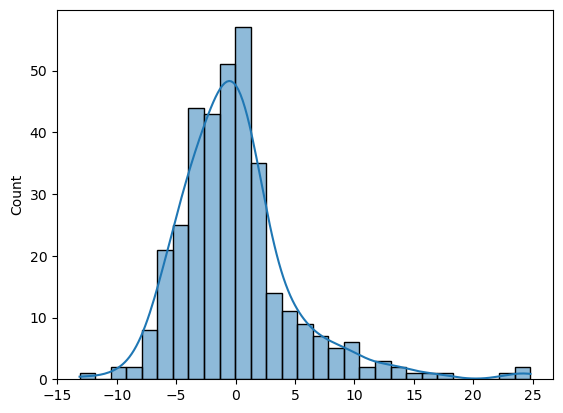

In [115]:
# Check the normality of error terms

# Plot histogram of residuals
sns.histplot(residuals, kde=True)
# Write your code here

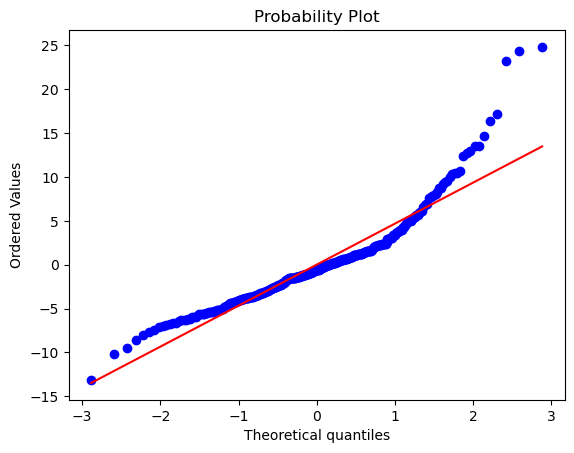

In [116]:
# Plot q-q plot of residuals
import pylab

import scipy.stats as stats

stats.probplot(residuals, dist = "norm", plot = pylab)

plt.show()

**Observation:**

- From the above plots, the residuals seem to follow a normal distribution. Hence, the corresponding assumption is satified.

## Cross validation

**Apply cross validation to improve the model and evaluate it using different evaluation metrics**

In [122]:
#Let's check the performance of the model using cross-validation technique from the scikit-learn library and see if the performance on the train and the test data is comparable to what we are getting after cross-validating the data.

# Import the required function

from sklearn.model_selection import cross_val_score

# Build the regression model and cross-validate
linearregression = LinearRegression()                                    

cv_Score1 = cross_val_score(linearregression, X_train_1, y_train_1, cv = 10)
cv_Score2 = cross_val_score(linearregression, X_train_2, y_train_2, cv = 10, 
                             scoring = 'neg_mean_squared_error')                                  


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score1.mean(), cv_Score1.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score2.mean(), cv_Score2.std() * 2))

RSquared: 0.663 (+/- 0.243)
Mean Squared Error: 26.726 (+/- 22.382)


**Observation:**

- After applying cross-validation the model score has improved. We can compare it by the evaluation metric scores.

## Final Model

In [134]:
X_1 = data.drop(columns='MEDV')
y_1 = data['MEDV']

X_1 = sm.add_constant(X_1)

X_train_1, X_test_1, y_train_1, y_test_1 =train_test_split(X_1, y_1, test_size=0.3, random_state=1)

model1=sm.OLS(y_train_1, X_train_1).fit()

#perf_model1 = model_function(model1, X_train_1, X_test_1)
#perf_model1

## **The best model is Model 1 because it does have a lowest RMSE & MAE and the highest R-squared. And after applying cross-validation the model score has improved.**

## Model equation

In [129]:
# Make a pandas DataFrame displaying the coefficients
from sklearn import linear_model

from sklearn.metrics import explained_variance_score,mean_absolute_error
lm = linear_model.LinearRegression()
model = lm.fit(X_train_1,y_train_1)
# Print the intercept value from the linear regression
intercept=model.intercept_

coef=pd.DataFrame(lm.coef_, X_train_1.columns, columns=['Coefficient'])
coef=coef.sort_values(by=['Coefficient'],ascending=False)
coef = coef.reset_index()
coef

,index,Coefficient
0,CHAS,2.868367
1,RM,2.746787
2,RAD,0.138141
3,ZN,0.047980
4,AGE,0.004101
5,const,0.000000
6,INDUS,-0.021617
7,CRIM,-0.111639
8,LSTAT,-0.582757
9,PTRATIO,-1.040913


In [130]:
# The model equation
equation = f"MEDV = {intercept} + " + " + ".join([f"({row['Coefficient']}) * ({row['index']})" for index, row in coef.iterrows()])
equation

'MEDV = 48.773488637293696 + (2.868366696811989) * (CHAS) + (2.746787385707098) * (RM) + (0.13814099153371437) * (RAD) + (0.04798022591978131) * (ZN) + (0.0041013406094800465) * (AGE) + (0.0) * (const) + (-0.021616888245794413) * (INDUS) + (-0.11163858783873745) * (CRIM) + (-0.5827571092742875) * (LSTAT) + (-1.040913247133598) * (PTRATIO) + (-1.4923198057844977) * (DIS) + (-23.20355815467906) * (NOX)'

## Actionable Insights and Recommendations 

- We can use the prediction model to predict the price of a house in a town or suburb (Boston) and the most important features affecting that price.
- The model explains around 63% of the variation in the data
- Houses with tract that don't bound with charles river have the highest number than tract that bound the river
- The value of homes is positively correlated to the number of rooms
- The tax rate increase with the number of non-retail business acres per town
- Houses built before 1940 increase as the area is polluted (Nitric Oxide concentration)
- The number of non-retail business acres per town increase as the area is polluted
- Tax rate is positively correlated to accessibility to radial highways
- The value of homes is negatively correlated to the status of population
- The high the distance to five Boston enployment centers, the less the number of non-retail business acre per town
- The high the distance to five Boston enployment centers, the less polluted the area is
- The high the distance to five Boston enployment centers, the less the number of houses built before 1940
- Transfortion log could have been done to deal with the the target variable that seems to be slightly skewed 
- The company should consider incorporating more external variables like economic indicators, housing market trends to enhance the model's predictive power
- Automate data collection to reduce too much outliers
- From the above equation,if we want to know the price of a house, we should take into consideration all the above features.

___